## Singapore Housing Prediction based on Resales
<hr>
Prediction of housing prices has been a popular topic in data science. In this project, the housing prices are being predicted based on the historical resale data from the Singaporean government. <br>

 After merging the data, we explore the data, then clean and preprocess the data and finally train the data to predict the test data. 

## Libraries
<hr>
The libraries used are pandas, numpy, seaborn, Counter, matplotlib, axes3d, linearregression.

In [15]:
#data analysis
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn import datasets

#visualization
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 1 Data Acquisition
<hr>
The data for this report is acquired from the Singapore government website. Data are collected from the period 1990 until now. The data online are divided into four seperate files, which we will merge in Python. Since the third file contains more than 20 mb of data, this file has been seperated into 2006 to 2012 and 2012 to 2014. This makes uploading the data on github possible.

In [16]:
#load dataset
data1 = pd.read_csv('sg-resale-flat-prices-1990-1999.csv', sep =',')
print('Number of training data =', data1.shape)

data2 = pd.read_csv('sg-resale-flat-prices-2000-2005.csv', sep =',')
print('Number of training data =', data2.shape)

data3 = pd.read_csv('sg-resale-flat-prices-2006-2012.csv', sep =',')
print('Number of training data =', data3.shape)

data4 = pd.read_csv('sg-resale-flat-prices-2012-2014.csv', sep =',')
print('Number of training data =', data4.shape)

data5 = pd.read_csv('sg-resale-flat-prices-2014-2018.csv', sep =',')
print('Number of training data =', data5.shape)

Number of training data = (288144, 10)
Number of training data = (197175, 10)
Number of training data = (172476, 10)
Number of training data = (52203, 10)
Number of training data = (58631, 11)


Following the shape of the data, the last data set contains 11 features instead of 10 if we compare with the other data sets. To check which feature is added to the last data set, we recall the variables of the first data sets and the variables of the last data set. 

In [17]:
#show features of data set 1
data1.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [5]:
#show features of data set 5
data5.tail(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
58626,2018-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,68,490000.0
58627,2018-01,YISHUN,5 ROOM,876,YISHUN ST 81,04 TO 06,121.0,Improved,1987,69,468000.0
58628,2018-01,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,146.0,Maisonette,1987,68,555000.0
58629,2018-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,69,550000.0
58630,2018-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,66,545000.0


By comparing the two data sets, we can see that the extra feature is the remaining lease year of the HBD housing. In Singapore, the lease of the HBD housing starts with 99 years. In the 99 years, the appartment can be resold to someone else, but this does not mean that 99 years will be refreshed. The number of years the previous owner has lived in the appartment will be substracted instead. After the remaining lease year, the current owner will have to move [source]. We believe this is an important feature to consider in the predictive model. Therefore, we will recalculate the row for the other data sets as well during the preprocessing stage. <br>

However, before the preprocessing stage, exploration will be done to figure out other possible changes. To continue with the exploration, the data should be merged. To merge the data, the datasets should consist of the same number of features. Therefore, the remaining lease variable will be removed first.

In [6]:
data5 = data5.drop('remaining_lease',1)
print('Number of training data =', data5.shape)

Number of training data = (58631, 10)


In [7]:
data5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0


### 1.1 Merge Datasets
Since the data are divided into five datasets, we want to merge the data for further exploration. To do this, the concatenation is used from pandas.

In [8]:
#concatenate dataset
sets = [data1, data2, data3, data4, data5]
data = pd.concat(sets)
print('Number of training data =', data.shape)


Number of training data = (768629, 10)


## 2 Exploration of the Dataset
<hr>
To start exploring the data, the datasets are loaded. From the dataset, we can conclude the data contain 709.998 datapoints and 10 features. 

### 2.1 Data description and information

In [18]:
#load dataset
n = data.shape[0]
print('Number of training data =',n)
print(data.shape)

Number of training data = 768629
(768629, 10)


We use data.describe() to have a look at some key metrics of the data set.

In [19]:
print(data.describe())

       floor_area_sqm  lease_commence_date  resale_price
count   768629.000000        768629.000000  7.686290e+05
mean        95.455564          1986.563476  2.823196e+05
std         26.210450             8.851260  1.424499e+05
min         28.000000          1966.000000  5.000000e+03
25%         72.000000          1980.000000  1.750000e+05
50%         93.000000          1985.000000  2.650000e+05
75%        114.000000          1993.000000  3.700000e+05
max        307.000000          2015.000000  1.180000e+06


We can conclude:
- All appartments vary between the size of 26.4 and 307 sqm. The median is 95.3 sqm.
- The oldest lease start date is 1996 and the oldest one is 2012. Thus no appartment in this list has a lease that expires before 2066. The mean lease start date is 1986. 
- Resale prices vary between 5000 SGD and 1.09 million SGD. It has to be verified if a price of 5000SGD is possible or is due to faulty data. The median price lies at 260k SGD.
- Overall, at a first glance the dataset seems to be clean and free of faulty datapoints. <br>

Now let's have a look at the data types.

In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768629 entries, 0 to 58630
Data columns (total 10 columns):
month                  768629 non-null object
town                   768629 non-null object
flat_type              768629 non-null object
block                  768629 non-null object
street_name            768629 non-null object
storey_range           768629 non-null object
floor_area_sqm         768629 non-null float64
flat_model             768629 non-null object
lease_commence_date    768629 non-null int64
resale_price           768629 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 64.5+ MB
None


In [21]:
data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

We can see that the data list is complete, as all features have 768.629 values. <br>

After loading the data, the data are explored. Features are checked to see whether cleaning and preprocessing of the data is needed.

## 2.2 Univariate plots

#### 2.2.1 Time of Sale

#### 2.2.2 Town

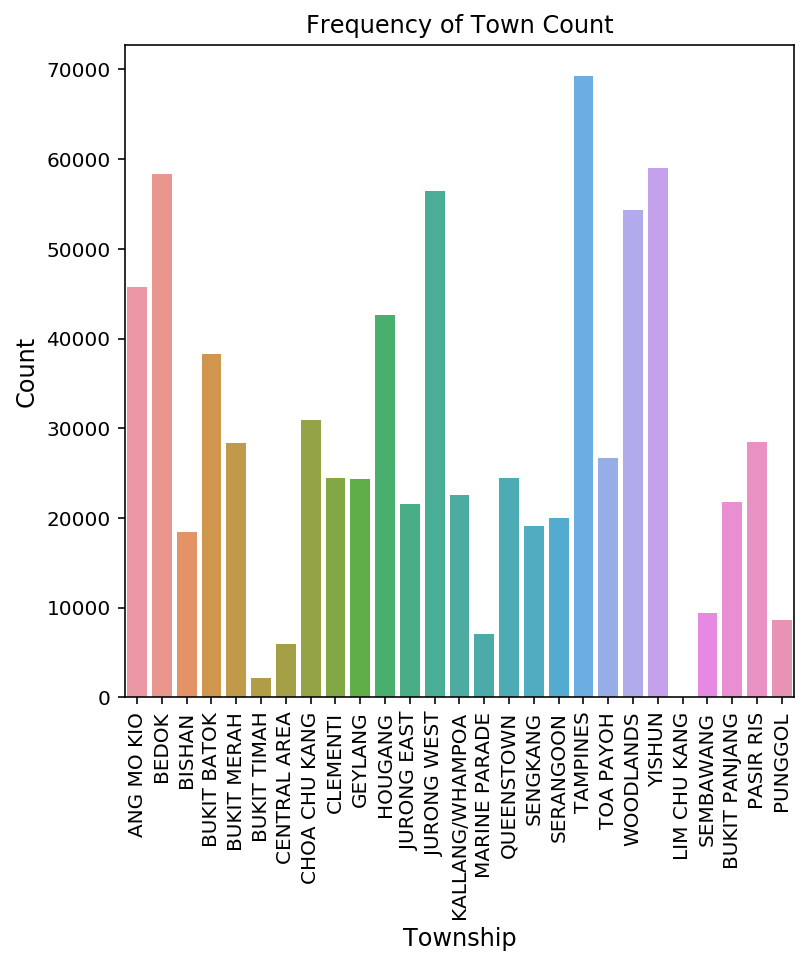

Total Town Count: 27
Town Count 
TAMPINES           69236
YISHUN             59020
BEDOK              58330
JURONG WEST        56447
WOODLANDS          54334
ANG MO KIO         45736
HOUGANG            42658
BUKIT BATOK        38291
CHOA CHU KANG      30913
PASIR RIS          28498
BUKIT MERAH        28376
TOA PAYOH          26724
QUEENSTOWN         24508
CLEMENTI           24504
GEYLANG            24400
KALLANG/WHAMPOA    22563
BUKIT PANJANG      21765
JURONG EAST        21570
SERANGOON          19989
SENGKANG           19095
BISHAN             18447
SEMBAWANG           9462
PUNGGOL             8596
MARINE PARADE       7070
CENTRAL AREA        5906
BUKIT TIMAH         2127
LIM CHU KANG          64
Name: town, dtype: int64


In [81]:
#town count
plt.figure(1,figsize=(6,6))

towns = data['town'].unique()
sns.countplot(x="town", data=data , order = towns)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Township', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Town Count", fontsize=12)
plt.show()

count_towns = data['town'].nunique()
print("Total Town Count:", count_towns)
towns_count = data['town'].value_counts()
print("Town Count \n" +str(towns_count))

#### 2.2.3 Flat_type

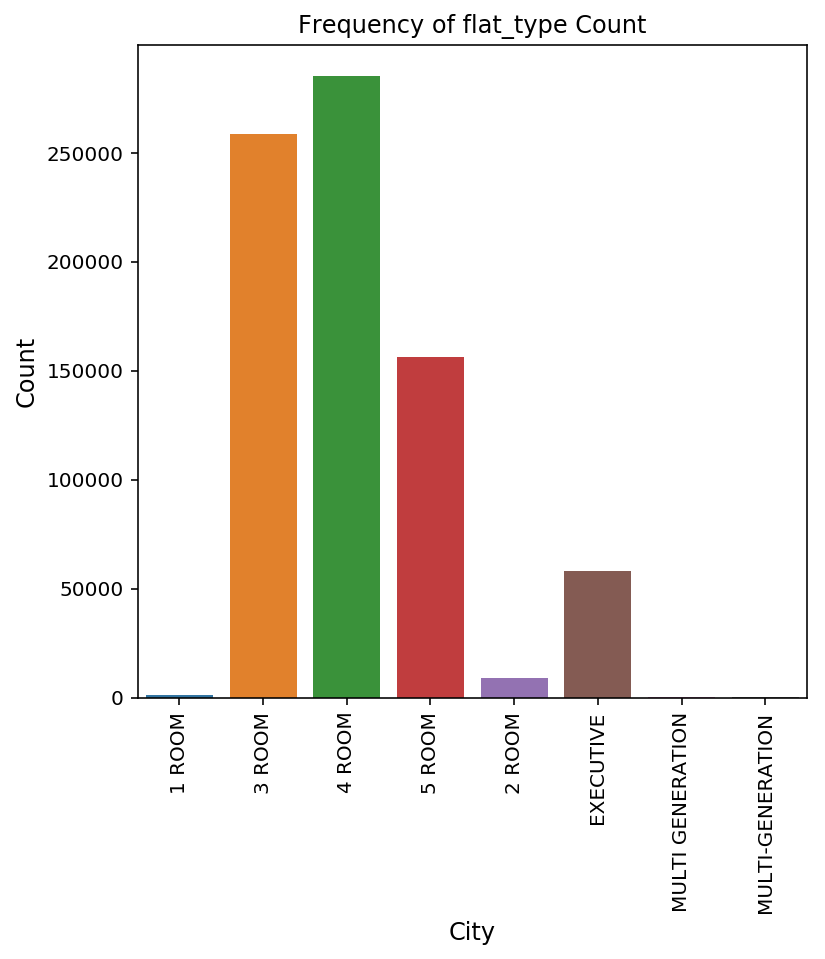

Total Flat Type Count: 8
Flat Type Count 
4 ROOM              285136
3 ROOM              258482
5 ROOM              156260
EXECUTIVE            58177
2 ROOM                8859
1 ROOM                1246
MULTI GENERATION       279
MULTI-GENERATION       190
Name: flat_type, dtype: int64


In [59]:
#flat_type count
plt.figure(2,figsize=(6,6))

flat_type = data['flat_type'].unique()
sns.countplot(x="flat_type", data=data , order = flat_type)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_type Count", fontsize=12)
plt.show()

count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
flat_type_count = data['flat_type'].value_counts()
print("Flat Type Count \n" +str(flat_type_count))

#### 2.2.4 Flat_model

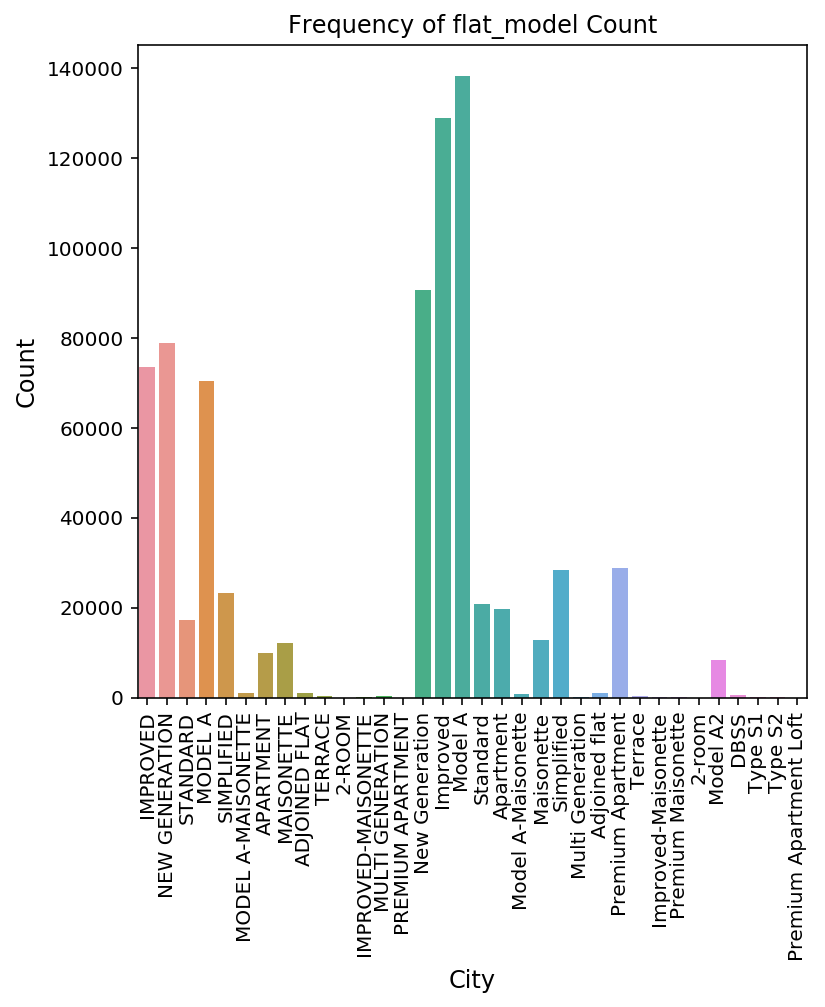

Total Flat Model Count: 34
Flat Model Count 
Model A                   138252
Improved                  129009
New Generation             90745
NEW GENERATION             78898
IMPROVED                   73593
MODEL A                    70381
Premium Apartment          28880
Simplified                 28346
SIMPLIFIED                 23258
Standard                   20859
Apartment                  19745
STANDARD                   17375
Maisonette                 12921
MAISONETTE                 12215
APARTMENT                   9901
Model A2                    8382
MODEL A-MAISONETTE           982
Adjoined flat                969
ADJOINED FLAT                944
Model A-Maisonette           802
DBSS                         601
Terrace                      362
MULTI GENERATION             279
TERRACE                      247
Multi Generation             190
Type S1                      183
Type S2                       80
Premium Maisonette            75
Improved-Maisonette           6

In [24]:
#flat_model count
plt.figure(3,figsize=(6,6))

flat_model = data['flat_model'].unique()
sns.countplot(x="flat_model", data=data , order = flat_model)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_model Count", fontsize=12)
plt.show()

count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

#### 2.2.5 Lease commencment year

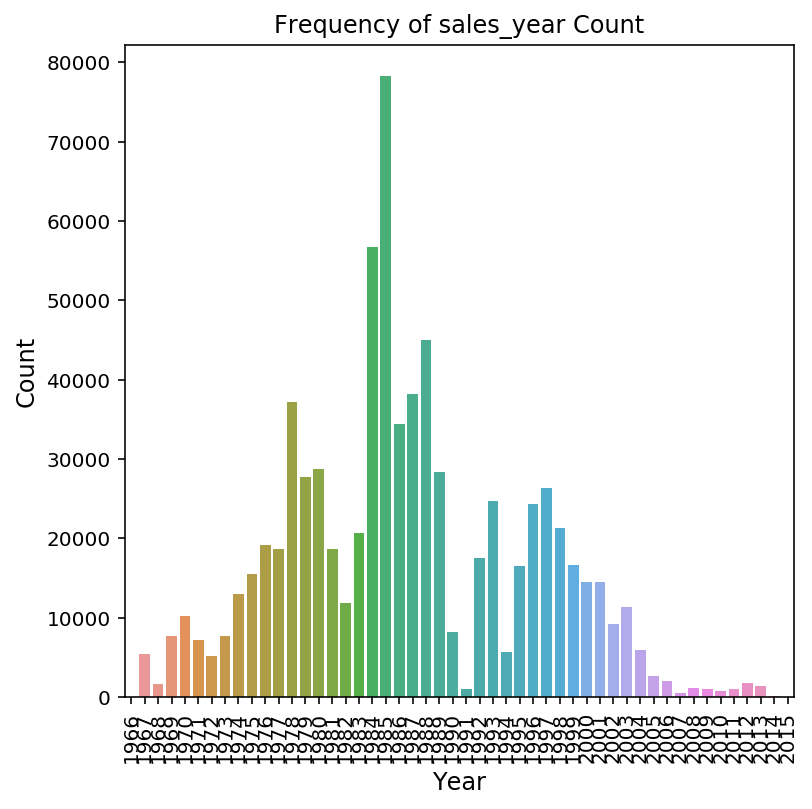

Total Sales Year Count: 50
Sales Year Count 
1985    78279
1984    56724
1988    45011
1987    38175
1978    37171
1986    34461
1980    28807
1989    28428
1979    27704
1997    26400
1993    24771
1996    24365
1998    21370
1983    20730
1976    19120
1977    18703
1981    18632
1992    17564
1999    16683
1995    16515
1975    15539
2001    14570
2000    14456
1974    13045
1982    11819
2003    11421
1970    10195
2002     9183
1990     8224
1973     7775
1969     7668
1971     7245
2004     6002
1994     5697
1967     5477
1972     5185
2005     2712
2006     2042
2012     1832
1968     1706
2013     1380
2008     1207
1991     1092
2011     1034
2009      998
2010      739
2007      583
2014      153
1966       21
2015       16
Name: lease_commence_date, dtype: int64


In [34]:
plt.figure(4,figsize=(6,6))

lease_year = np.unique(data['lease_commence_date'])
year_count_l = data['lease_commence_date'].value_counts()
sns.barplot(year_count_l.index, year_count_l.values, order=lease_year)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_year Count", fontsize=12)
#plt.xticks(np.arange(1950, 2000, 10.0))
plt.show()

count_lease_year = data['lease_commence_date'].nunique()
print("Total Sales Year Count:", count_lease_year)
lease_year_count = data['lease_commence_date'].value_counts()
print("Sales Year Count \n" +str(lease_year_count))

#### 2.2.6 Sales

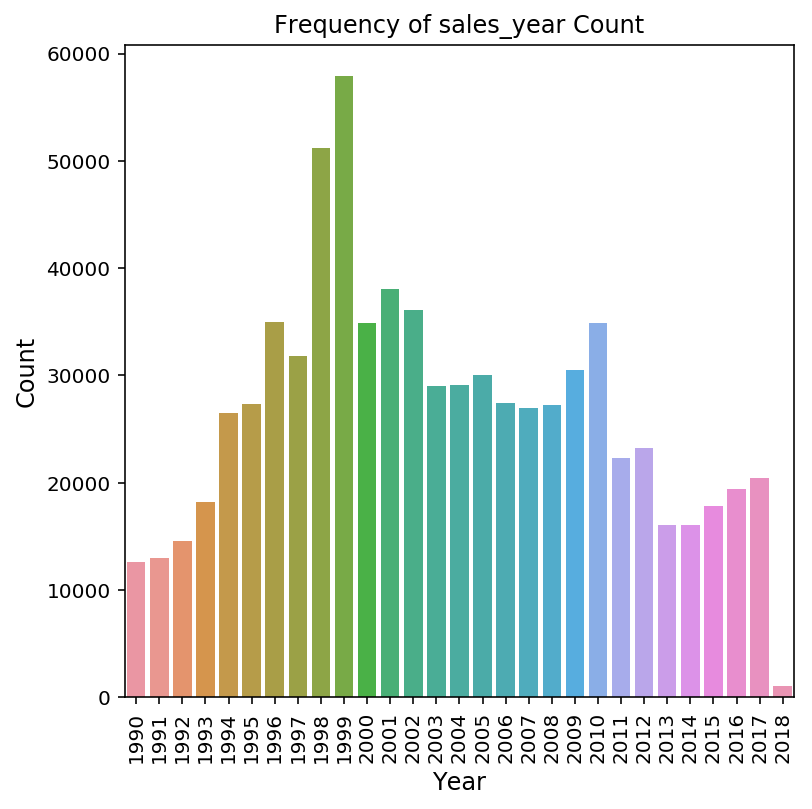

Total Sales Year Count: 29
Sales Year Count 
1999    57906
1998    51201
2001    38055
2002    36098
1996    35014
2000    34862
2010    34854
1997    31815
2009    30482
2005    30045
2004    29112
2003    29003
2006    27427
1995    27368
2008    27262
2007    26982
1994    26474
2012    23198
2011    22281
2017    20390
2016    19373
1993    18193
2015    17780
2013    16097
2014    16096
1992    14607
1991    12954
1990    12612
2018     1088
Name: month, dtype: int64


In [61]:
#yearly sales trend
plt.figure(4,figsize=(6,6))

sales_year = np.unique(pd.DatetimeIndex(data['month']).year.values)
year_count=pd.DatetimeIndex(data['month']).year.value_counts()
sns.barplot(year_count.index, year_count.values, order=sales_year)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_year Count", fontsize=12)
plt.show()

count_sales_year = (pd.DatetimeIndex(data['month']).year).nunique()
print("Total Sales Year Count:", count_sales_year)
sales_year_count = (pd.DatetimeIndex(data['month']).year).value_counts()
print("Sales Year Count \n" +str(sales_year_count))

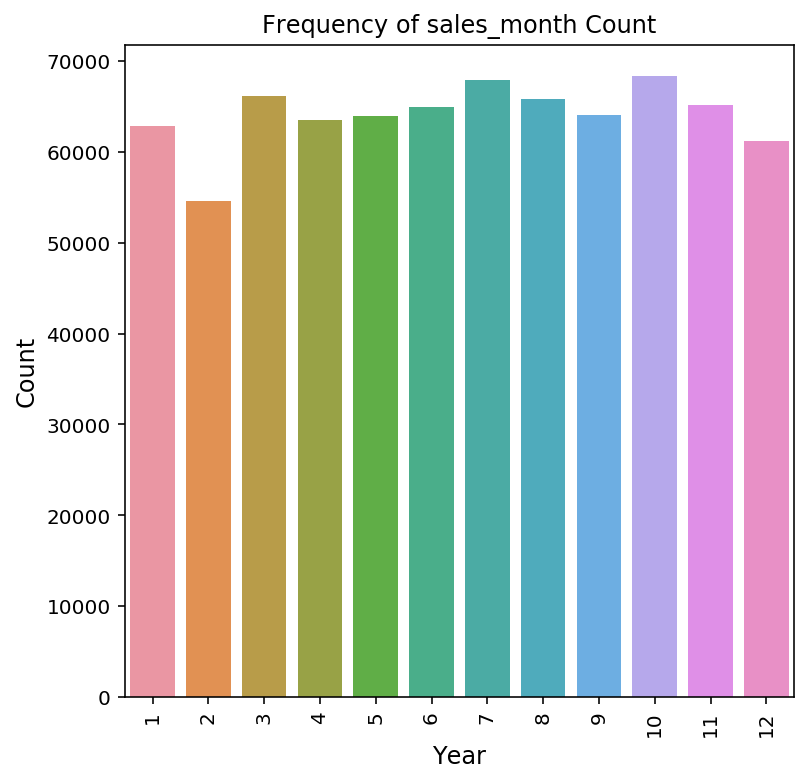

Sales Month Count 
10    68395
7     67944
3     66163
8     65883
11    65118
6     64940
9     64071
5     63941
4     63497
1     62865
12    61241
2     54571
Name: month, dtype: int64


In [82]:
#monthly sales trend
plt.figure(5,figsize=(6,6))

sales_month = np.unique(pd.DatetimeIndex(data['month']).month.values)
year_count=pd.DatetimeIndex(data['month']).month.value_counts()
sns.barplot(year_count.index, year_count.values, order=sales_month)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_month Count", fontsize=12)
plt.show()

sales_month_count = (pd.DatetimeIndex(data['month']).month).value_counts()
print("Sales Month Count \n" +str(sales_month_count))

In [ ]:
#scatterplot of one of the features
x1_train = data.iloc[:,6]
y_train = data.iloc[:,9]

plt.figure(1)
plt.scatter(x1_train, y_train, s=60, c='r', marker='+', label='Class0')
plt.title('Training data')
plt.xlabel('Size of apartment')
plt.ylabel('Housing price')
plt.show()

## 3 Cleaning and Preprocessing the Dataset
<hr>
After exploring the dataset, we came across the following points for preprocessing the data: 
- The feature month consists of sales year and month, e.g. 1990-01. To include the variable in the model, this variable will be seperated to a variable called sales year and a variable called month. 
- However, a linear regression will not be able to read the years, since it can see it as another numerical value. Therefore, the remaining lease year is calculated. Once the sales year variable is created, the remaining lease year can be computed by using the following formula: $remaining lease year = 99 - (sales year - lease commence date)$.
- Furthermore, there are rows containing characters. These rows (town, flat type, flat model and storey range) are transformed into dummy variables to clarify their levels, with other words, to quantify the qualitative data. <br>

### 3.1 Data Cleaning
During the exploration, there are some cleaning that should be performed. First, the flat types consist of eight types, which should be seven types instead. The flat type "Multi Generation" has a unique value with a space in between and one with a hyphen. 


### 3.2 Feature Engineering
In this part, we will explore new features that we can add to make our data more valuable. Since the data consists of seven objects, two floats and one integer, the seven objects will be researched and to see which can and will be changed. Note that adding and dropping variables have been changed to comments, because an error would pop up otherwise. This is because the variable is already added or dropped, thus it cannot be performed again.

In [114]:
data.tail(5)

#add sales year variable
#data.insert(1,'sales_year',(pd.DatetimeIndex(data['month']).year))

#add month2 variable
#data.insert(1,'month2',(pd.DatetimeIndex(data['month']).month))

#remove month variable
#data = data.drop('month',1)

#rename month2 variable
#data = data.rename(columns = {'month2':'month'})

#compute remaining lease variable
#data['remaining_lease'] = 99 - (data.sales_year - data.lease_commence_date)

#create dummies for town/area, flat type, flat model and storey range
#data['flat_type'] = data['flat_type'].str.replace('\-','').astype(str)


,month,sales_year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
58626,1,2018,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,490000.0,68
58627,1,2018,YISHUN,5 ROOM,876,YISHUN ST 81,04 TO 06,121.0,Improved,1987,468000.0,68
58628,1,2018,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,146.0,Maisonette,1987,555000.0,68
58629,1,2018,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,550000.0,69
58630,1,2018,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,545000.0,66


To check whether the remaining lease variable is correct, the data tail from dataset 5 in the data acquisition is used to compare with the new data. Since only the fifth data set consists of this data, we could use the column for validation. 

### 3.3 Variables

The variables considered in the research will be: <br>
$x_1$ Remaining lease year <br>
$x_2$ Floor area squared meters <br>
$D_3$ Town and/or Area <br>
$D_4$ Flat type <br>
$D_5$ Flat model <br>
$D_6$ Storey range <br>
$x_7$ Month <br>
$Y$ Resale price <br>

## 4 Data Analysis
<hr>
This part of the report will show algorithms that have been applied to predict the housing prices. We have focused on regressions with different features. <br>

### 4.1 Linear Regression
Predictive model with linear regression

### 4.2 Error Analysis 
To perform the error analysis, the accuracy are considered to 

### 4.3 Cross Validation
To check whether the data is overfitting 

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

## 5 Results
<hr>
Based on the analysis, the following results are derived:

## 6 Conclusion
<hr>
From this research, we can conclude